## X-Ray PNEUMONIA CLASSIFICATION

### Problem Statement

##### Pneumonia is a severe lung infection that can be life-threatening if not diagnosed and treated promptly. Accurate and early detection of pneumonia using chest X-rays is crucial for effective treatment. However, several real-world challenges make this task difficult:

* **High Volume of Cases:** Radiologists often face a high volume of X-ray images, making it challenging to review each image thoroughly, especially in high-demand settings like hospitals and clinics.

* **Diagnostic Accuracy:** Even experienced radiologists may miss subtle signs of pneumonia or confuse them with other conditions, leading to diagnostic errors.

##### To address these challenges, Leveraging a machine learning model using Convolutional Neural Networks (CNNs) to accurately classify pneumonia in chest X-ray images. This model will differentiate between normal lung images and those showing signs of pneumonia, providing an automated and consistent diagnostic tool.


### Data Description

* **Dataset:** Utilized the publicly available Chest X-ray Images (Pneumonia) dataset from Kaggle. 

* **Features:** The dataset contains three subfolders train,test and val. Each subfolder has two classes Normal and Pneumonia which contains images files respectively.

* **Target Variable:** The target variable is the presence or absence of pneumonia in the chest X-ray images

* **Obervations:** This is a an imbalanced dataset , consisting of a significant difference of total image files in normal and pneumonia classes. And for this I will be using SMOTE technique upscale the minority class. 

### Importing Libraries

##### Imported all the required libraries below for this project.

In [2]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Dropout , Flatten , BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

### First Approach

#### Using SMOTE for imbalanced dataset

##### Making lists and printing the filenames in the "Pneumonia Dataset/train/" directory. This is Training Directory which will be later used for training and validation purpose.

In [2]:
trainPath = "Pneumonia Dataset/train/"
train_dataset_directory = os.listdir(trainPath)
print(train_dataset_directory)

['NORMAL', 'PNEUMONIA']


"train_dataset_directory" have returned two classes "NORMAL" and "PNEUMONIA" in list format. This two classes will be used for classification.

.

##### Making lists and printing the filenames in the "Pneumonia Dataset/test/" directory. This is Testing Directory which will be later used for testing purpose.

In [3]:
test_dataset_directory = os.listdir("Pneumonia Dataset/test/")
print(test_dataset_directory)

['NORMAL', 'PNEUMONIA']


"test_dataset_directory" have returned two classes "NORMAL" and "PNEUMONIA" in list format. This two classes will be used for testing the model accuracy.

.

##### Preparing Image Data and Labels Using CV2

* Initializing data and target lists.

* Looping through image directories.

* Reading and resizing images.

* Appending images and their labels to the respective lists.


In [4]:
train_data = []
train_target = []

labels = ['NORMAL','PNEUMONIA']
for i in labels:
    path = os.path.join(trainPath,i)
    for img in os.listdir(path):
        one_image=cv2.imread(os.path.join(path,img))
        if one_image is not None :
            resize_img = cv2.resize(one_image,(100,100))
            train_data.append(resize_img)
            train_target.append(labels.index(i))


##### An insight into "train_data"

In [5]:
print(f"Length of 'train_data' is :- {len(train_data)}")
print(f"Type of 'train_data' is :- {type(train_data)}")

Length of 'train_data' is :- 5216
Type of 'train_data' is :- <class 'list'>


##### An insight into "train_target"

In [9]:
print(f"Length of 'train_target' is :- {len(train_target)}")
print(f"Type of 'train_target' is :- {type(train_target)}")

Length of 'train_target' is :- 5216
Type of 'train_target' is :- <class 'list'>


.

##### Here printing the number of image files in the classes "NORMAL" and "PNEUMONIA from the Train Dataset Directory.

In [10]:
count = 0

for subFolder in train_dataset_directory:
    files_Folder = list(os.listdir("Pneumonia Dataset/train/"+subFolder))
    print(subFolder+" Train Folder has "+str(len(files_Folder))+" Images ")
    count = count + len(files_Folder)
print(end="\n")
print("Train Images Folder Has "+str(count)+" Images")

NORMAL Train Folder has 1341 Images 
PNEUMONIA Train Folder has 3875 Images 

Train Images Folder Has 5216 Images


Observation :- The "NORMAL" class with 1341 Images has less files compared to "PNEUMONIA" class with 3875 Images. And the total number for image files in Train Dataset Directory is 5216.

.

##### Here printing the number of image files in the classes "NORMAL" and "PNEUMONIA from the Test Dataset Directory.

In [11]:
count = 0

for subFolder in test_dataset_directory:
    files_Folder = list(os.listdir("Pneumonia Dataset/test/"+subFolder))
    print(subFolder+" Test Folder has "+str(len(files_Folder))+" Images ")
    count = count + len(files_Folder)
print(end="\n")
print("Test Images Folder Has "+str(count)+" Images")

NORMAL Test Folder has 234 Images 
PNEUMONIA Test Folder has 390 Images 

Test Images Folder Has 624 Images


Observation :- The "NORMAL" class with 234 Images has less files compared to "PNEUMONIA" class with 390 Images. And the total number for image files in Test Dataset Directory is 624.

.

##### Sets directory path, image size, and batch size for training data

In [12]:
train_base_dir = "Pneumonia Dataset/train/"
train_img_size = 100
train_batch = 32

### image_dataset_from_directory

* It loads images from a directory into a TensorFlow dataset for training or evaluation.

Using "image_dataset_from_directory" for loading image files from "train_base_dir" and applying "batch_size" and "image_size" and saving it into "train_load_Dataset"

In [13]:
train_load_Dataset = tf.keras.utils.image_dataset_from_directory(train_base_dir, seed = 123,
batch_size=train_batch  , image_size=(train_img_size,train_img_size))

Found 5216 files belonging to 2 classes.


In [14]:
print(f" Length of train_load_Dataset is :- {len(train_load_Dataset)}") 

 Length of train_load_Dataset is :- 163


In [15]:
trainClassNames = train_load_Dataset.class_names

In [16]:
print(trainClassNames)

['NORMAL', 'PNEUMONIA']


In [17]:
print(f" Type of trainClassNames is :- {type(trainClassNames)}")

 Type of trainClassNames is :- <class 'list'>


An insight into "train_load_Dataset" gives us that the length is 163 , which means that the dataset contains 163 batches of images "(163*32 = 5216)" . "class_names" returned both the two classes "NORMAL" and "PNEUMONIA" in list format. 

.

##### Printing the shape and content of the first batch of images and labels from the "train_load_Dataset".

In [18]:
for train_image_batch, train_label_batch in train_load_Dataset.take(1):  
    print(f'Image batch shape: {train_image_batch.shape}')
    print(f'Label batch shape: {train_label_batch.shape}')
    print(f'Labels: {train_label_batch.numpy()}')

Image batch shape: (32, 100, 100, 3)
Label batch shape: (32,)
Labels: [0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


##### Observations :-

**Image batch shape** : 32 images, each 100x100 pixels with 3 color channels.

**Label batch shape** : 32 labels, one per image.

**Labels** : Array of labels corresponding to the 32 images, with "0" and "1" representing "NORMAL" and "PNEUMONIA" classes.

.

##### Visualizing first batch of images with their corresponding class labels from the training dataset.

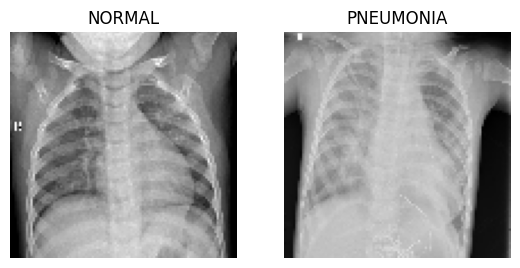

In [21]:
plt.figure(figsize=(10,10))

for images, labels in train_load_Dataset.take(1):
    for i in range(2):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(trainClassNames[labels[i]])
        plt.axis("off") 


Here is the images from both the classes "NORMAL" and "PNEUMONIA"

.

##### Sets directory path, image size, and batch size for testing data

In [22]:
test_base_dir = "Pneumonia Dataset/test/"
test_img_size = 100
test_batch = 32

### image_dataset_from_directory

* It loads images from a directory into a TensorFlow dataset for training or evaluation.

Using "image_dataset_from_directory" for loading image files from "test_base_dir"  and applying "batch_size" and "image_size" and saving it into "test_load_Dataset"

In [23]:
test_load_Dataset = tf.keras.utils.image_dataset_from_directory(test_base_dir, seed = 123,
batch_size=test_batch  , image_size=(test_img_size,test_img_size))

Found 624 files belonging to 2 classes.


In [24]:
print(f"Length of test_load_Dataset is :- {len(test_load_Dataset)}")

Length of test_load_Dataset is :- 20


In [25]:
testClassNames = test_load_Dataset.class_names

In [26]:
print(testClassNames)

['NORMAL', 'PNEUMONIA']


In [27]:
print(f"Type of testClassNames is :- {type(testClassNames)}")

Type of testClassNames is :- <class 'list'>


An insight into "test_load_Dataset" gives us that the length is 20 , which means that the dataset contains 20 batches of images "(20*32 = 640)" . "class_names" returned both the two classes "NORMAL" and "PNEUMONIA" in list format. 

.

##### Printing the shape and content of the first batch of images and labels from the "test_load_Dataset".

In [28]:
for test_image_batch, test_label_batch in test_load_Dataset.take(1):  # Take one batch
    print(f'Image batch shape: {test_image_batch.shape}')
    print(f'Label batch shape: {test_label_batch.shape}')
    print(f'Labels: {test_label_batch.numpy()}')

Image batch shape: (32, 100, 100, 3)
Label batch shape: (32,)
Labels: [0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1]


##### Observations :-

**Image batch shape** : 32 images, each 100x100 pixels with 3 color channels.

**Label batch shape** : 32 labels, one per image.

**Labels** : Array of labels corresponding to the 32 images, with "0" and "1" representing "NORMAL" and "PNEUMONIA" classes.

.

##### Visualizing first batch of images with their corresponding class labels from the testing dataset.

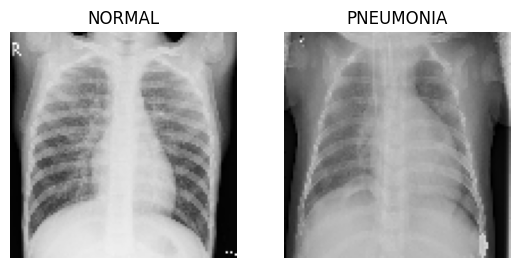

In [29]:
plt.figure(figsize=(10,10))

for images, labels in test_load_Dataset.take(1):
    for i in range(2):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(testClassNames[labels[i]])
        plt.axis("off")

Here is the images from both the classes "NORMAL" and "PNEUMONIA"

.

##### Preparing For SMOTE
Before applying SMOTE into the data , it needs to be converted into appropiate format for efficient results.


Here , converting the batches of images and labels from the dataset into single contiguous arrays which is preferable format for SMOTE.

In [66]:
train_images_list, train_labels_list = [], []
for train_image_batch, train_label_batch in train_load_Dataset:
    train_images_list.append( train_image_batch.numpy())
    train_labels_list.append(train_label_batch.numpy())

train_images_array = np.vstack(train_images_list) 
train_labels_array = np.hstack(train_labels_list)

Collected and concatenates all image batches from "train_load_Dataset" into one large array (images). Using "vstack" for Vertically stacks arrays (images) into a single array.

Collected and concatenates all label batches from "train_load_Dataset" into one large array (labels). Using "hstack" for Horizontally stacks arrays (labels) into a single array.

.

In [68]:
print("Printing images array :-")
print(train_images_array[0][0][0])

Printing images array :-
[137.56 137.56 137.56]


##### An insight into "train_images_array"

In [69]:
print(f"Shape of train_images_array is :- {train_images_array.shape}")
print(f"Length of train_images_array is :- {len(train_images_array)}")
print(f"Dimension of train_images_array is :- {train_images_array.ndim}")
print(f"Type of train_images_array is :- {type(train_images_array)}") 

Shape of train_images_array is :- (5216, 100, 100, 3)
Length of train_images_array is :- 5216
Dimension of train_images_array is :- 4
Type of train_images_array is :- <class 'numpy.ndarray'>


##### An insight into "train_labels_array"

In [70]:
print("Printing train_labels_array :-")
print(train_labels_array)

Printing train_labels_array :-
[0 0 1 ... 1 1 1]


In [71]:
print(f"Shape of train_labels_array is :- {train_labels_array.shape}")
print(f"Length of train_labels_array is :- {len(train_labels_array)}")
print(f"Dimension of train_labels_array is :- {train_labels_array.ndim}")
print(f"Type of train_labels_array is :- {type(train_labels_array)}")

Shape of train_labels_array is :- (5216,)
Length of train_labels_array is :- 5216
Dimension of train_labels_array is :- 1
Type of train_labels_array is :- <class 'numpy.ndarray'>


##### Extracting and assigning the number of samples, image height, width, and channels from the shape of "train_images_array".

In [72]:
number_of_samples, height, width, channels = train_images_array.shape

In [73]:
print(f"Samples numbers :- {number_of_samples}, height :- {height}, width :- {width} , channels :- {channels}")

Samples numbers :- 5216, height :- 100, width :- 100 , channels :- 3


##### Flattens each image into a 1D array while maintaining the number of samples. Preparing the data for SMOTE which require's 2D inputs.

In [74]:
images_reshaped = train_images_array.reshape(number_of_samples, -1)

In [75]:
print("Printing Reshaped Images")
print(images_reshaped[0])

Printing Reshaped Images
[137.56 137.56 137.56 ...   0.     0.     0.  ]


##### An insight into "images_reshaped".

In [120]:
print(f"Shape of reshaped images :- {images_reshaped.shape}")
print(f"Length of reshaped images :- {len(images_reshaped)}")
print(f"Dimension of reshaped images :- {images_reshaped.ndim}")
print(f"Type of reshaped image :- {type(images_reshaped)}")

Shape of reshaped images :- (5216, 30000)
Length of reshaped images :- 5216
Dimension of reshaped images :- 2
Type of reshaped image :- <class 'numpy.ndarray'>


### SMOTE (Synthetic Minority Over-sampling Technique)

1. **Use Case** : 
* Balances imbalanced datasets by generating synthetic samples for the minority class, improving model performance.

2. **Objective** : 
* As earlier we saw the distribution of image files in class "NORMAL" is very less compared to class "PNEUMONIA" this data imbalance can lead to models overfitting for a single class consisting of major files. The models exposure will be very limited to one particular class and moving head will give bias and wrong predictions when introduced to new data. To overcome this issue using SMOTE to counter balance both the classes with equal number of data so the model could have exposure of distinct difference on the both classes and be able to predict and classify accordingly.

In [121]:
smote = SMOTE(random_state=42)
images_Resampled, labels_Resampled = smote.fit_resample(images_reshaped, train_labels_array)

An insight into "images_Resampled" and "labels_Resampled"

In [122]:
print(f"Shape of resampled images :- {images_Resampled.shape} and Shape of resampled labels {labels_Resampled.shape}")
print(f"Length of resampled images {len(images_Resampled)} and length of resampled labels {len(labels_Resampled)}")
print(f"images_Resampled :- {type(images_Resampled)} , labels_Resampled :- {type(labels_Resampled)} ")

Shape of resampled images :- (7750, 30000) and Shape of resampled labels (7750,)
Length of resampled images 7750 and length of resampled labels 7750
images_Resampled :- <class 'numpy.ndarray'> , labels_Resampled :- <class 'numpy.ndarray'> 


##### Reshaping "images_Resampled" 
* reshaping back to its original 4D shape (samples, height, width, channels). And saving it into "Xtrain_resampled". 

##### Prepares the balanced data for model training. Ensures compatibility with CNN input requirements. 

In [123]:
Xtrain_resampled = images_Resampled.reshape((images_Resampled.shape[0], height, width, channels))

An insight into "Xtrain_resampled"

In [124]:
print(f"Shape of resampled Xtrain is :- {Xtrain_resampled.shape}")
print(f"Dimension in resampled Xtrain is :- {Xtrain_resampled.ndim}")
print("Xtrain_resampled :-")
print(Xtrain_resampled[0][0][0])

Shape of resampled Xtrain is :- (7750, 100, 100, 3)
Dimension in resampled Xtrain is :- 4
Xtrain_resampled :-
[137.56 137.56 137.56]


### Data Augmentation
* Initializes a data augmentation pipeline for training images
* Enhances model robustness by generating varied training samples through random flipping, rotation, and zooming.

In [125]:
dataAugmentation = Sequential([
    layers.RandomFlip("horizontal",input_shape=(100,100,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

c:\Users\Sambhu\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##### Visualizing "dataAugmentation" training images.

* Applies data augmentation to a batch of images.

* Displays the first augmented image in a 3x3 grid without axes.

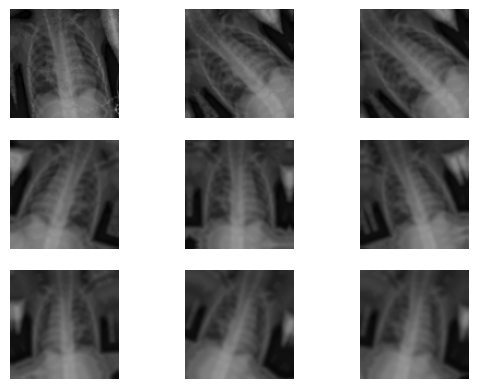

In [82]:
for images, labels in train_load_Dataset.take(1):
    for i in range(9):
        images = dataAugmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.axis("off")

### CNN Model For Image Classification.

##### Components:

* dataAugmentation: Applies augmentation to input images.

* Conv2D layers: Extracts features with increasing filters (16, 32, 64).

* MaxPooling2D layers: Reduces spatial dimensions.

* Dropout layers: Prevents overfitting.

* Flatten layer: Converts 2D features to 1D.

* Dense layers: Performs final classification (128 units, then 2 units).

* Activation Function: Using "relu" as activation function 

In [126]:
clfModel = Sequential([
    dataAugmentation,
    Conv2D(16,3,padding="same",activation="relu",input_shape=(100,100,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(32,3,padding="same",activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Conv2D(64,3,padding="same",activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128,activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(2)
])

c:\Users\Sambhu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Configuring the model for training.

##### Components:

* Optimizer: Using Adam for efficient gradient-based optimization.

* Loss Function: Using Sparse Categorical Crossentropy to measure prediction error for classification.

* Metrics: Tracks accuracy during training.

In [127]:
clfModel.compile(optimizer="adam"
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

Displaying a summary of the model's architecture using "summary()" feature. Layer types, output shapes, and number of parameters for each layer will be returned.

In [128]:
clfModel.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100, 100, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 50, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,204,578 (4.60 MB)

 Trainable params: 1,204,098 (4.59 MB)

 Non-trainable params: 480 (1.88 KB)

**Summary**:

* **Total params**: Total parameters in the model (trainable + non-trainable) , which is  1,204,578 for the clfModel.

* **Trainable params**: Parameters that are updated during training , for the clfModel trainable params are 1,204,098.

* **Non-trainable params**: Parameters that are not updated during training , for the moclfModel Non-Trainable params are 480.


### Callbacks 

In [129]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
model_Check = ModelCheckpoint('First_Method_X_Ray_Classification_Model.keras',monitor='val_accuracy',save_best_only=True,mode='max',verbose=1)

Summary :

1. EarlyStopping: Stops training when validation loss stops improving, with a patience of 8 epochs.
2. ReduceLROnPlateau: Reduces learning rate by a factor of 0.5 when validation loss plateaus, with a patience of 8 epochs.
3.ModelCheckpoin: Saves the model with the best validation accuracy to 'best_model.keras'.

These callbacks help improve model performance and efficiency during training! 

### Training the model on the resampled dataset.

Components:

* Xtrain_resampled, labels_Resampled: Training data and labels.
* validation_split=0.2: Uses 20% of the data for validation.
* epochs=100: Runs training for up to 100 epochs.
* callbacks: Uses early stopping, learning rate reduction, and model checkpointing to enhance training.

In [130]:
history = clfModel.fit(
    Xtrain_resampled,
    labels_Resampled,
    validation_split=0.3,
    epochs=100,
    callbacks=[early_stopping, lr_scheduler,model_Check]
)

Epoch 1/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7945 - loss: 0.5828
Epoch 1: val_accuracy improved from -inf to 0.16903, saving model to First_Method_X_Ray_Classification_Model.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 113ms/step - accuracy: 0.7947 - loss: 0.5819 - val_accuracy: 0.1690 - val_loss: 2.2430 - learning_rate: 0.0010
Epoch 2/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8954 - loss: 0.2643
Epoch 2: val_accuracy improved from 0.16903 to 0.80774, saving model to First_Method_X_Ray_Classification_Model.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 19s 110ms/step - accuracy: 0.8955 - loss: 0.2642 - val_accuracy: 0.8077 - val_loss: 0.4531 - learning_rate: 0.0010
Epoch 3/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9195 - loss: 0.2064
Epoch 3: val_accuracy improved from 0.80774 to 0.93462, saving model to First_Method_X_Ray_Classification_Model.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 19s 110ms/step - accuracy: 0.9195 - loss: 0.2064 - val_accuracy: 

**Summary** :

With the "val_accuracy" of "0.99914" <- The model correctly classifies "99.91%" of validation data.

The model performs exceptionally well on both training and validation datasets

In [131]:
clfModel.save("First_Method_X_Ray_Classification_Model.h5")

##### Retrieving the model from the file 'best_model.keras' from ModelCheckpoint.

In [132]:
best_clfModel = load_model('First_Method_X_Ray_Classification_Model.keras') 

### Preparing Test Data for evaluation 
As we had passed resampled values from SMOTE into the CNN Model our model would require same format of test data input for evaluation.   

Here , converting the batches of images and labels from the dataset into single contiguous arrays.

In [168]:
test_images_list, test_labels_list = [] , []

for test_image_files, test_label_files in test_load_Dataset:
    test_images_list.append(np.array(test_image_files))
    test_labels_list.append(np.array(test_label_files))

test_images_array = np.vstack(test_images_list)
test_labels_array = np.hstack(test_labels_list)

Collected and concatenates all image batches from "test_load_Dataset" into one large array (images). Using "vstack" for Vertically stacks arrays (images) into a single array.

Collected and concatenates all label batches from "test_load_Dataset" into one large array (labels). Using "hstack" for Horizontally stacks arrays (labels) into a single array.

In [169]:
print("Printing images array :-")
print(test_images_array[0][0][0])

Printing images array :-
[67.98305 67.98305 67.98305]


An insight into "test_images_array" and "test_labels_array"

In [148]:
print(f" Type of test_images_array :- {type(test_images_array)}")
print(f" Shape of test_images_array :- {test_images_array.shape } and test_labels_list :- {test_labels_array.shape}")

 Type of test_images_array :- <class 'numpy.ndarray'>
 Shape of test_images_array :- (624, 100, 100, 3) and test_labels_list :- (624,)


### Evaluate
##### Evaluating the performance of the best_clfModel on the test dataset. Returns the loss and accuracy metrics for the test dataset.

In [170]:
first_val_loss , first_val_accuracy = best_clfModel.evaluate(test_images_array,test_labels_array)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8307 - loss: 0.3923


In [171]:
print(f"val_accuracy :- {first_val_accuracy} and val_loss :- {first_val_loss}")

val_accuracy :- 0.8205128312110901 and val_loss :- 0.3937831223011017


**Summary** :

* Val Accuracy: "0.8205128312110901" - The model correctly classifies "82.05%" of test data.

* Val Loss: "0.3937831223011017" - The model's error on the test data.

##### The model performs well on unseen data but could be improved for higher accuracy.

### Classification Metrics

##### Importing the following classification metrics "accuracy_score, precision_score, recall_score, f1_score, confusion_matrix"

* Accuracy: Proportion of correctly predicted instances.

* Precision: Proportion of true positives among predicted positives.

* Recall: Proportion of true positives identified among actual positives.

* F1 Score: Harmonic mean of precision and recall.

* Confusion Matrix: Table showing true positives, true negatives, false positives, and false negatives.

In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [177]:
first_method_predictions = best_clfModel.predict(test_images_array)
first_method_y_pred = np.argmax(first_method_predictions, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [178]:
first_method_accuracy = accuracy_score(test_labels_array , first_method_y_pred)
first_method_precision = precision_score(test_labels_array , first_method_y_pred) 
first_method_recall = recall_score(test_labels_array , first_method_y_pred)
first_method_f1 = f1_score(test_labels_array , first_method_y_pred)
first_method_CM = confusion_matrix(test_labels_array , first_method_y_pred)


In [179]:
print(f"Accuracy: {first_method_accuracy}")
print(f"Precision: {first_method_precision}")
print(f"Recall: {first_method_recall}")
print(f"F1 Score: {first_method_f1}")
print(f"Confusion Matrix:\n {first_method_CM}")


Accuracy: 0.8205128205128205
Precision: 0.9455128205128205
Recall: 0.7564102564102564
F1 Score: 0.8404558404558404
Confusion Matrix:
 [[217  17]
 [ 95 295]]


**Summary** :

* Accuracy: 0.8205: About 82.05% of instances were correctly classified.
* Precision: 0.94551: Of the predicted positives, 82.06% were true positives.
* Recall: 0.75641: The model correctly identified 96.15% of the actual positives.
* F1 Score: 0.84045584: Balance between Precision and Recall.

1 . Accuracy: (TP + TN) / (TP + FP + FN + TN)
* Accuracy = (295 + 217 ) / (295 + 17 + 95 + 217) = 0.8205128205128205

2 . Precision: TP / (TP + FP)
* Precision = 295 / (295 + 17) = 0.9455128205128205

3 . Recall (Sensitivity): TP / (TP + FN)
* Recall = 295 / (295 + 95) = 0.7564102564102564

4 . F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
* F1 Score = 2 * (0.9455128205128205 * 0.7564102564102564) / (0.9455128205128205 + 0.7564102564102564) = 0.8404558404558404

<br>

**Confusion Matrix:**

* True Negatives (217): Correctly identified negatives.
* False Positives (17): Incorrectly identified as positives.
* False Negatives (95): Incorrectly identified as negatives.
* True Positives (295): Correctly identified positives.

### Visualizing the Confusion Matrix

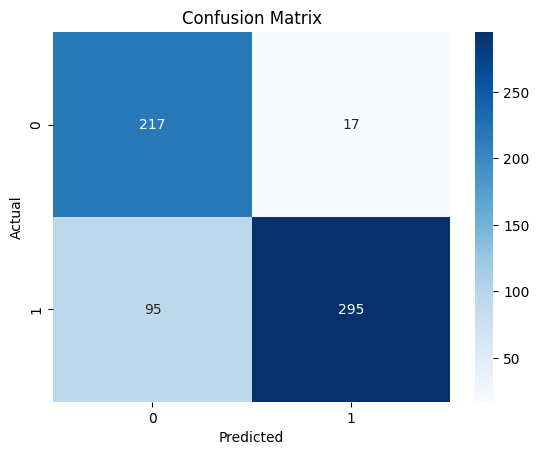

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(first_method_CM, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Observation**

* True Negatives (217): Correctly identifying normal X-rays as normal.
* False Positives (17): Incorrectly identifying normal X-rays as pneumonia.
* False Negatives (95): Incorrectly identifying pneumonia X-rays as normal.
* True Positives (295): Correctly identifying pneumonia X-rays as pneumonia.

### Ploting the training loss and validation loss over epochs.

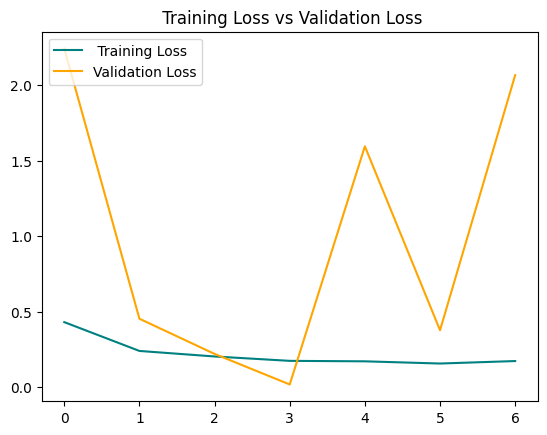

In [184]:
accuracy, val_accuracy = history.history['loss'], history.history['val_loss']

fig = plt.figure()
plt.plot(accuracy, color = 'teal', label=' Training Loss')
plt.plot(val_accuracy, color = 'orange', label='Validation Loss')
plt.title(' Training Loss vs Validation Loss')
plt.legend(loc='upper left')
plt.show()


**Observations** :

1. Rapid Initial Learning:
* The sharp drop in validation loss during the initial epochs indicates that the model is learning quickly from the validation data.
* The training loss starting low and remaining stable suggests that the model generalizes well to unseen data from the beginning.



### Ploting the training accuracy and validation accuracy over epochs.

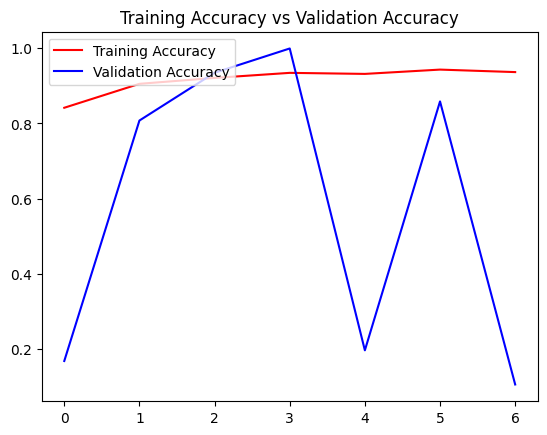

In [185]:
accuracy, val_accuracy = history.history['accuracy'], history.history['val_accuracy']

fig = plt.figure()
plt.plot(accuracy, color = 'red', label='Training Accuracy')
plt.plot(val_accuracy, color = 'blue', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

Here , the red line represents "Training Accuracy" and blue line indicates "Validation Accuracy" . 

**Observations:** : 

1. Rapid Initial Learning: 
* The rapid increase in validation accuracy during the initial epochs indicates that the model is learning quickly from the validation data.
* The high initial validation accuracy suggests that the model initially generalizes well to unseen data, but the subsequent fluctuations indicate variability in performance.

2. Fluctuations in Validation Accuracy:
* The significant fluctuations in validation accuracy suggest that the model's performance on unseen data is inconsistent. This could be due to various factors such as the complexity of the validation dataset, the model's sensitivity to the training process, or the need for further regularization.
* The fluctuations could also indicate that the model is still adapting to the data and has not fully stabilized.

3. Stabilization and Convergence: 
* The stabilization of training accuracy and the general upward trend in validation accuracy in the later epochs suggest that the model is improving and becoming more consistent.


### Image Classification Function

Loading and preprocesses an image.

Using the trained model "clfModel" to predict the image's class.

Returning the predicted class and confidence score.

In [186]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(100,100))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = clfModel.predict(input_image_exp_dim)
    result = tf.nn.sigmoid(predictions[0])
    outcome = 'The Image belongs to ' + trainClassNames[np.argmax(result)] + ' X-Ray Category with a score of '+ str(np.max(result)*100)
    return outcome

In [187]:
classify_images("Pneumonia Dataset/Sample/PNEUMONIA/person1949_bacteria_4880.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


'The Image belongs to PNEUMONIA X-Ray Category with a score of 15.579067170619965'

The model is able to classify new unseen images with very minor error's. The model have room for improvement. For medical use case this model fits best only for learning purposes. With more quality dataset with appropiate labels this technology can definitely perform way better and accurate.

.

.

.

.

.

.

.

## Second Approach
### A direct classification

##### Let's explore this further to understand how would have model performed without addressing the fact of imbalance. Main goal to take the "accuracy , val_accuracy and evaluation over test data" and make a reasonable comparision with balanced data accuracies.

##### Sets directory path, image size, and batch size for Training Data

In [381]:
secMethod_Train_base_dir = "Pneumonia Dataset/train/"
secMethod_img_size = 100
secMethod_batch = 32

Using "image_dataset_from_directory" for loading image files from "newTrain_base_dir" and applying "batch_size" and "image_size" and saving it into "newTrainDataset", also created subset as "training" and reserved "20%" for "validation" using "validation_split". This "newTrainDataset" will be used for training purposes.

In [382]:
secMethod_TrainDataset = tf.keras.utils.image_dataset_from_directory(secMethod_Train_base_dir, seed = 123,
validation_split = 0.2 , subset = "training" , batch_size=secMethod_batch 
, image_size=(secMethod_img_size,secMethod_img_size))

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


Using "image_dataset_from_directory" for loading image files from "newTrain_base_dir" and applying "batch_size" and "image_size" and saving it into "newValDataset", also created subset as "validation" and reserved "20%" for "validation" using "validation_split". This "newValDataset" wil be used for validation purposes.

In [383]:
secMethod_ValDataset = tf.keras.utils.image_dataset_from_directory(secMethod_Train_base_dir, seed = 123,
validation_split = 0.2 , subset = "validation" , batch_size=secMethod_batch 
, image_size=(secMethod_img_size,secMethod_img_size))

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


### Optimizing Data Pipeline

AUTOTUNE : Enhances performance by dynamically adjusting data loading based on system capabilities.

cache(): Caches data for faster retrieval.

shuffle(1000): Randomizes data with a buffer size of 1000.

prefetch(buffer_size = AUTOTUNE): Overlaps data preprocessing with model training for efficiency.

In [384]:
AUTOTUNE = tf.data.AUTOTUNE
secMethod_TrainDataset = secMethod_TrainDataset.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
secMethod_ValDataset = secMethod_ValDataset.cache().prefetch(buffer_size = AUTOTUNE)

### CNN Model For Image Classification.

##### Components:

* dataAugmentation: Applies augmentation to input images.

* Conv2D layers: Extracts features with increasing filters (16, 32, 64).

* MaxPooling2D layers: Reduces spatial dimensions.

* Dropout layers: Prevents overfitting.

* Flatten layer: Converts 2D features to 1D.

* Dense layers: Performs final classification (128 units, then 2 units).

* Activation Function: Using "relu" as activation function 

In [385]:
secMethod_Model = Sequential([
    dataAugmentation,
    layers.Rescaling(1./255,input_shape=(100,100,3)),
    Conv2D(16,3,padding="same",activation="relu"),
    MaxPooling2D(),
    Conv2D(32,3,padding="same",activation="relu"),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64,3,padding="same",activation="relu"),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(2)
])

c:\Users\Sambhu\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Configuring the model for training.

##### Components:

* Optimizer: Using "rmsprop" for efficient gradient-based optimization. (Compared with adam , rmsprop have improved overall performance) 

* Loss Function: Using Sparse Categorical Crossentropy to measure prediction error for classification.

* Metrics: Tracks accuracy during training.

In [386]:
secMethod_Model.compile(optimizer="rmsprop"
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

Displaying a summary of the model's architecture using "summary()" feature. Layer types, output shapes, and number of parameters for each layer will be returned.

In [387]:
secMethod_Model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 100, 100, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 50, 50, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 50, 50, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,203,618 (4.59 MB)

 Trainable params: 1,203,618 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

Summary:

1. Total params: Total parameters in the model (trainable + optimizer). For newModel there are "1,203,618" total params.

2. Trainable params: Parameters updated during training , there are "1,203,618"  trainable params for newModel.

3. Non-trainable params: Parameters not updated during training. There are "0" Non-trainable params. 

### Callback Function

In [388]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
model_Check = ModelCheckpoint('secMethod_Model.keras',monitor='val_accuracy',save_best_only=True,mode='max',verbose=1)

Summary :

1. EarlyStopping: Stops training when validation loss stops improving, with a patience of 3 epochs.
2. ReduceLROnPlateau: Reduces learning rate by a factor of 0.5 when validation loss plateaus, with a patience of 3 epochs.
3.ModelCheckpoin: Saves the model with the best validation accuracy to 'best_model.keras'.

These callbacks help improve model performance and efficiency during training! 

### Training the model  

Components:

* newTrainDataset : Training data.
* newValDataset : Validation data.
* epochs=100: Runs training for up to 100 epochs.
* callbacks: Uses early stopping, learning rate reduction, and model checkpointing to enhance training.

In [396]:
secMethod_history = secMethod_Model.fit(secMethod_TrainDataset,epochs=100,validation_data=secMethod_ValDataset,callbacks=[early_stopping, lr_scheduler,model_Check])

Epoch 1/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9638 - loss: 0.0991
Epoch 1: val_accuracy did not improve from 0.96836
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9638 - loss: 0.0990 - val_accuracy: 0.9636 - val_loss: 0.0945 - learning_rate: 6.2500e-05
Epoch 2/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9604 - loss: 0.0976
Epoch 2: val_accuracy did not improve from 0.96836
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9604 - loss: 0.0975 - val_accuracy: 0.9597 - val_loss: 0.1031 - learning_rate: 6.2500e-05
Epoch 3/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9686 - loss: 0.0854
Epoch 3: val_accuracy did not improve from 0.96836
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9685 - loss: 0.0854 - val_accuracy: 0.9626 - val_loss: 0.0989 - learning_rate: 6.2500e-05
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9655 - loss: 0.0834
Epoch 4: val_accuracy did not improve from 0.96836
131/13

**Summary** :

With the "val_accuracy" of "0.96836" <- The model correctly classifies "96.84%" of validation data.

The model performs exceptionally well on both training and validation datasets

##### Retrieving the model from the file 'new_model.keras' from ModelCheckpoint.

In [397]:
secMethod_NewModel = load_model('secMethod_Model.keras')

### Evaluate
##### Evaluating the performance of the new_model on the test dataset. Returns the loss and accuracy metrics for the test dataset.

In [398]:
secMethod_valLoss, secMethod_valAccuracy = secMethod_NewModel.evaluate(test_load_Dataset)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8380 - loss: 0.4490


In [399]:
print(f"val_accuracy :- {secMethod_valAccuracy} and val_loss :- {secMethod_valLoss}")

val_accuracy :- 0.8461538553237915 and val_loss :- 0.4840981960296631


**Summary** :

* Val Accuracy: "0.8461538553237915" - The model correctly classifies "84.62%" of test data.

* Val Loss: "0.4840981960296631" - The model's error on the test data.

##### The model performs well on unseen data but could be improved for higher accuracy.

### Classification Metrics

##### Importing the following classification metrics "accuracy_score, precision_score, recall_score, f1_score, confusion_matrix"

* Accuracy: Proportion of correctly predicted instances.

* Precision: Proportion of true positives among predicted positives.

* Recall: Proportion of true positives identified among actual positives.

* F1 Score: Harmonic mean of precision and recall.

* Confusion Matrix: Table showing true positives, true negatives, false positives, and false negatives.

In [404]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [405]:
secMethod_predictions = secMethod_NewModel.predict(test_load_Dataset)
secMethod_y_pred = np.argmax(secMethod_predictions, axis=1)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


### Converting Batch Labels to Single Array

* Initialize List: Created an empty list secMethod_labels.
* Loop Through Dataset: Iterated over batches in test_load_Dataset.
* Append Labels: Converted batch labels to numpy arrays and append to the list.
* Flatten Array: Converted the list of arrays into a single numpy array.

In [410]:
secMethod_labels = []
for images , labels in test_load_Dataset:
    secMethod_labels.append(labels.numpy())
    
secMethod_labels_array = np.hstack(secMethod_labels)

##### An insight into secMethod_labels_array

In [423]:
print("Length of 'secMethod_labels_array' :- ",len(secMethod_labels_array))
print("Type of 'secMethod_labels_array' :- ",type(secMethod_labels_array))
print(" 'secMethod_labels_array' :- ",secMethod_labels_array[0:10])

Length of 'secMethod_labels_array' :-  624
Type of 'secMethod_labels_array' :-  <class 'numpy.ndarray'>
 'secMethod_labels_array' :-  [1 1 1 1 1 0 1 0 1 0]


In [411]:
secMethod_accuracy = accuracy_score(secMethod_labels_array, secMethod_y_pred)
secMethod_precision = precision_score(secMethod_labels_array, secMethod_y_pred) 
secMethod_recall = recall_score(secMethod_labels_array, secMethod_y_pred)
secMethod_f1 = f1_score(secMethod_labels_array, secMethod_y_pred)
secMethod_CM = confusion_matrix(secMethod_labels_array, secMethod_y_pred)

In [412]:
print(f"Accuracy: {secMethod_accuracy}")
print(f"Precision: {secMethod_precision}")
print(f"Recall: {secMethod_recall}")
print(f"F1 Score: {secMethod_f1}")
print(f"Confusion Matrix:\n {secMethod_CM}")

Accuracy: 0.5544871794871795
Precision: 0.6171548117154811
Recall: 0.7564102564102564
F1 Score: 0.6797235023041475
Confusion Matrix:
 [[ 51 183]
 [ 95 295]]


**Summary** :

* Accuracy: 0.5545: About 55.45% of instances were correctly classified.
* Precision: 0.6172: Of the predicted positives, 61.72% were true positives.
* Recall: 0.7564: The model correctly identified 75.64% of the actual positives.
* F1 Score: 0.6797: Balance between Precision and Recall.

1 . Accuracy: (TP + TN) / (TP + FP + FN + TN)
* Accuracy = (295 + 51) / (295 + 51 + 183 + 95) = 346 / 624 = 0.554 or 55.4%

2 . Precision: TP / (TP + FP)
* Precision = 295 / (295 + 183) = 295 / 478 = 0.617 or 61.7%

3 . Recall (Sensitivity): TP / (TP + FN)
* Recall = 295 / (295 + 95) = 295 / 390 = 0.756 or 75.6%

4 . F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
* F1 Score = 2 * (0.617 * 0.756) / (0.617 + 0.756) = 0.679 or 67.9%

<br><br>

Confusion Matrix:

* True Negatives (51): Correctly identified negatives.
* False Positives (183): Incorrectly identified as positives.
* False Negatives (95): Incorrectly identified as negatives.
* True Positives (295): Correctly identified positives.



.

### Visualizing the Confusion Matrix

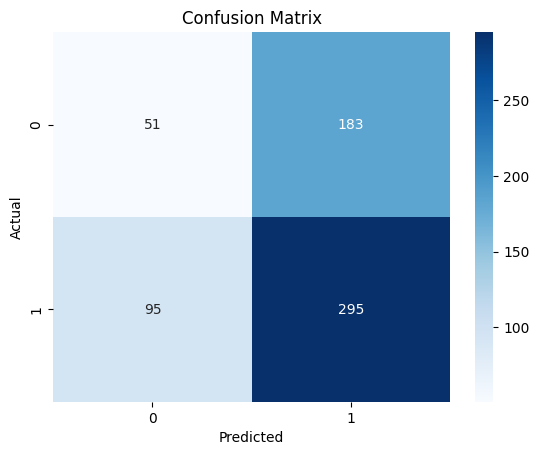

In [425]:
sns.heatmap(secMethod_CM, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:

* True Negatives (51): Correctly identified normal X-rays.
* False Positives (183): Incorrectly identified normal X-rays as pneumonia.
* False Negatives (95): Incorrectly identified pneumonia X-rays as normal.
* True Positives (295): Correctly identified pneumonia X-rays.

### Ploting the training loss and validation loss over epochs.

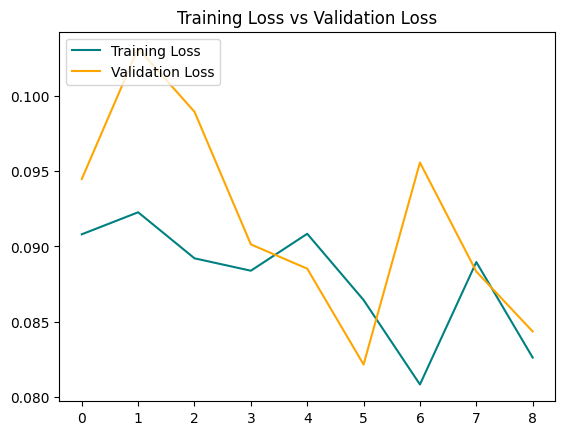

In [419]:
accuracy, val_accuracy = secMethod_history.history['loss'], secMethod_history.history['val_loss']

fig = plt.figure()
plt.plot(accuracy, color = 'teal', label='Training Loss')
plt.plot(val_accuracy, color = 'orange', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend(loc='upper left')
plt.show()

**Observations** :

1. Recovery: 
* The sharp decrease in validation loss after epoch 4 indicates that the model might be recovering from overfitting, possibly due to adjustments in the training process (e.g. dropout, or learning rate adjustments).

2. Convergence: 
* By epoch 6, both training and validation losses are decreasing and converging, which is a desirable outcome as it indicates that the model is generalizing well to unseen data.

The graph suggests that the model initially experienced some overfitting but eventually improved its generalization performance. There is still room for better performance and stability.


### Ploting the training accuracy and validation accuracy over epochs.

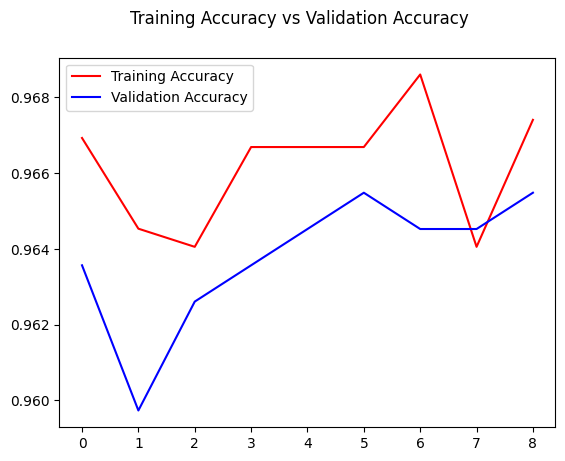

In [418]:
accuracy, val_accuracy = secMethod_history.history['accuracy'], secMethod_history.history['val_accuracy']

fig = plt.figure()
plt.plot(accuracy, color = 'red', label='Training Accuracy')
plt.plot(val_accuracy, color = 'blue', label='Validation Accuracy')
fig.suptitle('Training Accuracy vs Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

**Observations** :

1. Recovery: 
* The increase in validation accuracy after epoch 2 indicates that the model might be recovering from overfitting.

2. Convergence: 
* By epoch 7, the training accuracy have increased, and the validation accuracy is increasing,the model is generalizing better to unseen data.


The graph suggests that the model initially experienced some overfitting but eventually improved its generalization performance. There is still room for better performance and stability.



.

### Image Classification Function

Loading and preprocesses an image.

Using the trained model "clfModel" to predict the image's class.

Returning the predicted class and confidence score.

In [426]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(100,100))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = secMethod_NewModel.predict(input_image_exp_dim)
    result = tf.nn.sigmoid(predictions[0])
    outcome = 'The Image belongs to ' + trainClassNames[np.argmax(result)] + ' X-Ray Category with a score of '+ str(np.max(result)*100)
    return outcome 

In [427]:
classify_images("Pneumonia Dataset/Sample/PNEUMONIA/person1949_bacteria_4880.jpeg") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


'The Image belongs to PNEUMONIA X-Ray Category with a score of 94.82844471931458'

The model have correctly classified the unseen image with a score of "94.82844471931458"

.

**Conclusion** :

##### First Approach(Model) By Handling Data Imbalance :

**Summary** :

* Accuracy: 0.8205: About 82.05% of instances were correctly classified.
* Precision: 0.94551: Of the predicted positives, 82.06% were true positives.
* Recall: 0.75641: The model correctly identified 96.15% of the actual positives.
* F1 Score: 0.84045584: Balance between Precision and Recall.

**Confusion Matrix:**

* True Negatives (217): Correctly identified negatives.
* False Positives (17): Incorrectly identified as positives.
* False Negatives (95): Incorrectly identified as negatives.
* True Positives (295): Correctly identified positives.


##### Second Approach(Model) A direct approach :

Accuracy Scores :

* Accuracy: 0.5545: About 55.45% of instances were correctly classified.
* Precision: 0.6172: Of the predicted positives, 61.72% were true positives.
* Recall: 0.7564: The model correctly identified 75.64% of the actual positives.
* F1 Score: 0.6797: Balance between Precision and Recall.

Confusion Matrix :

* True Negatives (51): Correctly identified normal X-rays.
* False Positives (183): Incorrectly identified normal X-rays as pneumonia.
* False Negatives (95): Incorrectly identified pneumonia X-rays as normal.
* True Positives (295): Correctly identified pneumonia X-rays.




.